# Collateral Factor Calculator

Prepared by crypgoat, MonetCapital, and ryanl


This program calculates safe maximum collateral factors for Compound's underlying assets, based on either 1 standard deviation (risky) or 3 standard deviation (conservative) difference from the 45-day mean price.


In [2]:
#Imports libraries
import requests as rq
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Import API data
url = rq.get('https://api.flipsidecrypto.com/api/v2/queries/563dcad5-bc45-4f86-8a82-7ff45937e8e5/data/latest')
raw_dataset = url.json()
dataset = pd.DataFrame(raw_dataset).set_index('TIME')

In [4]:
#Group and perform calculations
grouped = dataset.groupby(['SYMBOL','TIME']).first()
grouped_stdev = dataset.groupby(['SYMBOL']).std()
grouped_mean = dataset.groupby(['SYMBOL']).mean()

In [5]:
#Display mean
grouped_mean

,PRICE
SYMBOL,
BAT,1.268452
COMP,554.162551
DAI,1.001703
ETH,2416.252805
UNI,34.277078
USDC,1.000762
USDT,1.000791
WBTC,57078.053363
ZRX,1.815265


In [6]:
#Display standard deviation
grouped_stdev

,PRICE
SYMBOL,
BAT,0.141603
COMP,135.050815
DAI,0.002314
ETH,549.026470
UNI,5.035391
USDC,0.001778
USDT,0.001956
WBTC,3203.184510
ZRX,0.249622


In [7]:
#1 sigma collateral factor calculations
risky_cf = pd.DataFrame([(grouped_mean['PRICE']-grouped_stdev['PRICE'])/grouped_mean['PRICE']])
risky_cf

SYMBOL,BAT,COMP,DAI,ETH,UNI,USDC,USDT,WBTC,ZRX
PRICE,0.888365,0.756297,0.99769,0.772778,0.853097,0.998223,0.998046,0.943881,0.862487


In [8]:
#3 sigma collateral factor calculations
conservative_cf = pd.DataFrame([(grouped_mean['PRICE']-3*grouped_stdev['PRICE'])/grouped_mean['PRICE']])
conservative_cf

SYMBOL,BAT,COMP,DAI,ETH,UNI,USDC,USDT,WBTC,ZRX
PRICE,0.665096,0.268892,0.993069,0.318333,0.559292,0.99467,0.994138,0.831642,0.587462


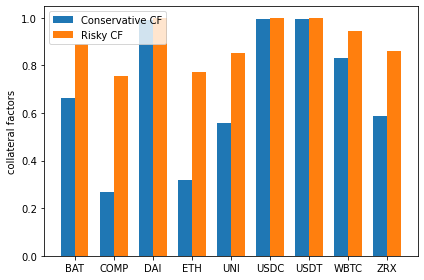

In [12]:
labels = list(conservative_cf.columns)
list_conservative_cf = list(conservative_cf.loc['PRICE'])
list_risky_cf = list(risky_cf.loc['PRICE'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, list_conservative_cf, width, label='Conservative CF')
rects2 = ax.bar(x + width/2, list_risky_cf, width, label='Risky CF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('collateral factors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()